# ⛪ **Estudo de Caso II: A Basílica Subterrânea**

## **1. Simulação de Prospecção Geofísica (Dados Raster)**

Diferente do cenário anterior, onde trabalhamos com coordenadas vetoriais dispersas, neste estudo simularemos a saída bruta de um equipamento de **GPR (Ground Penetrating Radar)** ou **Magnetometria**.

Neste contexto, o sítio arqueológico é representado como uma **Matriz Gigante** (Grid), onde cada célula (pixel) representa a intensidade do sinal refletido pelo subsolo em uma coordenada específica.


## ☝ **Fase 1: Parâmetros da Simulação**
* **Alta Resolução:** Criaremos uma malha de $2000 \times 2000$, totalizando **4 milhões de pontos de dados**. Isso aproxima o exercício de um cenário de Big Data real.
* **O "Fantasma" Arquitetônico:** Utilizaremos geração procedural para "enterrar" uma estrutura complexa (uma Basílica com planta cruciforme) sob o ruído geológico.
* **Física do Sinal:**
    * **Solo (Fundo):** Baixa intensidade, com variação aleatória (ruído gaussiano).
    * **Muros (Estrutura):** Alta intensidade, representando materiais densos (pedra/tijolo).
    * **Artefatos:** Picos de sinal extremo espalhados aleatoriamente (metais/cerâmica).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- FASE 1: CONFIGURAÇÃO DA SIMULAÇÃO ---
# 2000 x 2000 = 4 milhões de pontos de dados.
# Tentamos aumentar o número de dados fabricados para aproximação à realidade
LARGURA = 2000
ALTURA = 2000

print(f"Iniciando simulação de sítio arqueológico ({LARGURA}x{ALTURA})...")
print("Gerando ruído geológico de fundo...")

# -- 1. CRIANDO O SOLO (RUÍDO GAUSSIANO) --
np.random.seed(42)      # Usamos uma 'seed' para que o mapa seja sempre o mesmo toda vez que rodar
sitio_arqueologico = np.random.normal(loc = 10, scale = 5, size = (ALTURA, LARGURA))      # Cria uma matriz gigante com valores aleatórios baixos (o solo natural)

# -- FUNÇÃO PARA CONSTRUIR ESTRUTURAS ENTERRADAS --
def construir_muro(matriz, x0, y0, x1, y1, intensidade = 50, espessura = 15):
    # Simula uma parede adicionando valor à matriz naquelas coordenadas
    # Adicionamos ruído à própria parede para não ficar "perfeita" demais (buscamos fazer uma ruína)

    # Determina os limites do muro
    r_min, r_max = min(y0, y1), max(y0, y1)
    c_min, c_max = min(x0, x1), max(x0, x1)

    # Se for linha vertical ou horizontal
    if x0 == x1: # Muro Vertical
        ruido_muro = np.random.normal(loc = intensidade, scale = 10, size = (r_max - r_min, espessura))
        matriz[r_min:r_max, x0:x0 + espessura] += ruido_muro
    elif y0 == y1: # Muro Horizontal
        ruido_muro = np.random.normal(loc = intensidade, scale = 10, size = (espessura, c_max - c_min))
        matriz[y0:y0 + espessura, c_min:c_max] += ruido_muro

print("Construindo as ruínas da Basílica...")

Iniciando simulação de sítio arqueológico (2000x2000)...
Gerando ruído geológico de fundo...
Construindo as ruínas da Basílica...


> **Nota de Engenharia:** A função `construir_muro` não desenha linhas perfeitas. Adicionamos propositalmente um componente de ruído (`np.random.normal`) à própria estrutura para simular o estado de ruína, onde partes da parede desmoronaram ou foram roubadas ao longo dos séculos.

Gerando mapa de calor (Heatmap)...


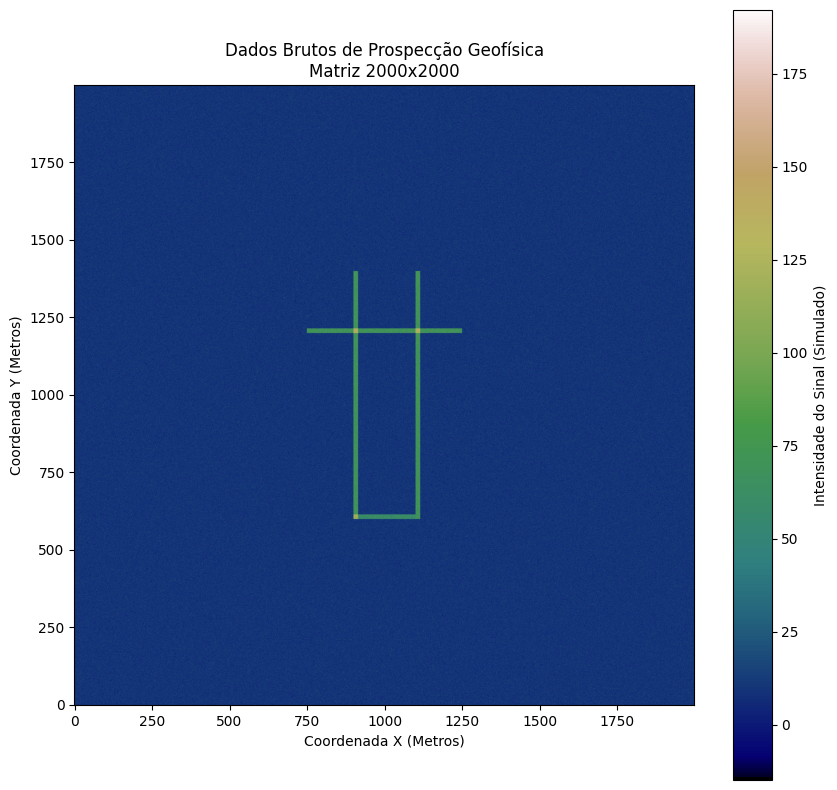

In [2]:
# -- 2. CONSTRUINDO A "BASÍLICA PERDIDA" (Coordenadas fictícias na matriz) --
centro_x = LARGURA // 2
centro_y = ALTURA // 2

# Nave Central (Retângulo longo)
construir_muro(sitio_arqueologico, centro_x - 100, centro_y - 400, centro_x - 100, centro_y + 400, intensidade = 60)   # Parede Esq
construir_muro(sitio_arqueologico, centro_x + 100, centro_y - 400, centro_x + 100, centro_y + 400, intensidade = 60)   # Parede Dir

# Transepto (A cruz que corta a nave)
construir_muro(sitio_arqueologico, centro_x - 250, centro_y + 200, centro_x + 250, centro_y + 200, intensidade = 60)   # Parede Fundo

# Fechamento inferior e superior
construir_muro(sitio_arqueologico, centro_x - 100, centro_y - 400, centro_x + 100, centro_y - 400, intensidade = 50)   # Entrada

# -- 3. ADICIONANDO ARTEFATOS ESPARSOS (Pontos de metal/cerâmica) --
num_artefatos = 500     # Escolhemos 500 pontos aleatórios para terem um "pico" de sinal
y_art = np.random.randint(0, ALTURA, num_artefatos)
x_art = np.random.randint(0, LARGURA, num_artefatos)
sitio_arqueologico[y_art, x_art] = 100      # Valor alto = metal ou objeto denso

# --- VISUALIZAÇÃO PRELIMINAR ---
print("Gerando mapa de calor (Heatmap)...")

plt.figure(figsize = (10, 10))
plt.imshow(sitio_arqueologico, cmap = 'gist_earth', origin = 'lower')
plt.colorbar(label='Intensidade do Sinal (Simulado)')
plt.title(f"Dados Brutos de Prospecção Geofísica\nMatriz {LARGURA}x{ALTURA}")
plt.xlabel("Coordenada X (Metros)")
plt.ylabel("Coordenada Y (Metros)")
plt.show()

### 📡 **Análise Visual: O "Fantasma" no Ruído**

A imagem gerada acima representa a visualização bruta dos dados simulados de sensoriamento remoto. Ao contrário de uma fotografia aérea convencional, este **Mapa de Calor (Heatmap)** exibe a intensidade do sinal refletido pelo subsolo.

**O que estamos vendo?**

1.  **A Planta Baixa (Sinal Estrutural):** No centro da matriz, emerge claramente um padrão geométrico de maior intensidade (tons mais claros/esverdeados). A forma de **Cruz Latina** é inconfundível, revelando as paredes da Nave Central e do Transepto da basílica soterrada.
2.  **O Estado de Ruína (Incerteza):** Note que as linhas não são sólidas ou perfeitas. Elas apresentam falhas e variações de intensidade, simulando o desgaste natural, desmoronamentos e a mistura de materiais ao longo dos séculos.
3.  **Ruído de Fundo (Solo):** A textura granulada que cobre toda a imagem representa o solo natural. É o "chiado" que nossos algoritmos precisarão aprender a ignorar.
4.  **Anomalias Pontuais (Artefatos):** Os pontos brancos brilhantes espalhados aleatoriamente representam objetos de alta densidade (como moedas, ferramentas de metal ou cerâmica) que retornam um sinal muito forte ao sensor. *Talvez seja imperceptíveis aos olhos quase, porém, o sistema reconhece.*

**Conclusão Preliminar:** Embora a estrutura seja visível ao olho humano devido ao contraste exagerado da simulação, em um cenário real o ruído seria muito mais intenso. O desafio computacional agora será transformar essa "imagem" (raster) em vetores precisos de latitude e longitude.

## 📉 **Fase 2: Processamento de Sinal e Segmentação**

Com os dados brutos em mãos, o próximo desafio é separar o **Sinal** (a Basílica) do **Ruído** (o Solo). Para isso, não usamos adivinhação, mas estatística.

### **1. Diagnóstico por Histograma**
Antes de filtrar, precisamos entender a distribuição dos dados.
* Ao "achatarmos" a matriz (`flatten`), transformamos o mapa 2D em uma longa lista de números.
* O **Histograma** nos mostra a frequência de cada valor de intensidade.
* **A Expectativa:** Esperamos ver uma grande "montanha" de valores baixos (o solo comum) e uma "cauda" pequena de valores altos (as paredes e artefatos).

### **2. Limiarização (Thresholding)**
Com base no histograma, definimos um **Limiar de Corte** (*Threshold*).
* Tudo **abaixo** do limiar é descartado como ruído geológico.
* Tudo **acima** do limiar é classificado como "Interesse Arqueológico".
* O resultado é um **Mapa Binário** (Preto e Branco), uma técnica fundamental em Visão Computacional para segmentação de objetos.

Analisando a distribuição estatística dos dados...


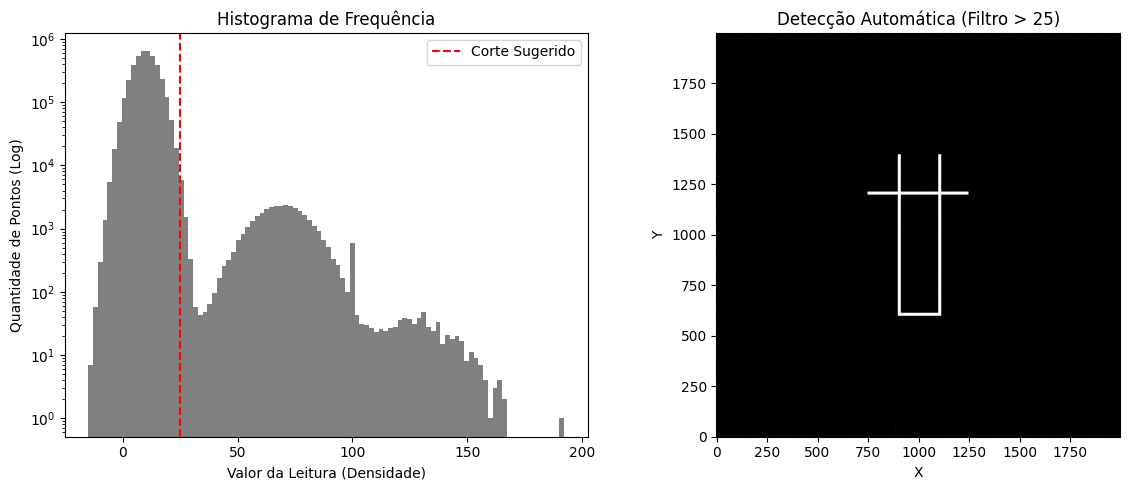



Total de pontos analisados: 4000000
Pontos de interesse detectados: 39656


In [9]:
# --- FASE 2: ANÁLISE E FILTRAGEM DE DADOS ---

print("Analisando a distribuição estatística dos dados...")

# -- 1. O HISTOGRAMA (O "Raio-X" dos dados) --
# Vamos "achatá-los" (flatten) para analisar todos os números de uma vez
dados_flat = sitio_arqueologico.flatten()

plt.figure(figsize = (12, 5))

# Plotagem do Histograma
plt.subplot(1, 2, 1)
plt.hist(dados_flat, bins = 100, color = 'gray', log = True)    # log = True, ajuda a ver os detalhes menores
plt.title("Histograma de Frequência")
plt.xlabel("Valor da Leitura (Densidade)")
plt.ylabel("Quantidade de Pontos (Log)")
plt.axvline(x = 25, color = 'r', linestyle = '--', label = 'Corte Sugerido')    # Linha visual
plt.legend()

# -- 2. A MÁSCARA (O "Filtro") --
# Vamos definir que tudo acima de 25 é interessante.
# Na arqueologia real, esse número vem de cálculos de Desvio Padrão.
limiar = 25
mapa_binario = sitio_arqueologico > limiar

# Plotagem do Mapa Limpo
plt.subplot(1, 2, 2)
plt.imshow(mapa_binario, cmap = 'gray', origin = 'lower')
plt.title(f"Detecção Automática (Filtro > {limiar})")
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()

print("\n")
print(f"Total de pontos analisados: {len(dados_flat)}")
print(f"Pontos de interesse detectados: {np.sum(mapa_binario)}")

### 📊 **Interpretação dos Resultados**

As imagens acima ilustram o processo de tomada de decisão do algoritmo:

#### **1. O Histograma (Gráfico à Esquerda)**
Este gráfico revela a "assinatura estatística" do sítio.
* **A Grande Montanha (Esquerda):** A enorme barra cinza concentrada entre 0 e 20 representa o solo natural. Como usamos escala logarítmica (`log=True`), percebemos que a vasta maioria dos 4 milhões de pontos é apenas terra.
* **A Cauda Longa (Direita):** Os valores que se estendem para a direita (acima de 25) são raros, mas intensos. Estes são os nossos muros e artefatos.
* **A Linha Vermelha (Corte):** O tracejado marca o nosso limiar ($threshold = 25$). Tudo à esquerda dela foi considerado "lixo"; tudo à direita foi salvo como "estrutura".

#### **2. O Mapa Binário (Gráfico à Direita)**
Ao aplicarmos o corte definido no histograma, a "magia" acontece:
* A nuvem de ruído desaparece (fica preta).
* A **planta baixa da Basílica** emerge em branco (pixels ativos).
* Podemos ver claramente a **Nave Central** alongada e o **Transepto** cruzando-a, confirmando a arquitetura religiosa clássica.

> **Nota:** Embora a forma esteja visível, ela ainda é apenas um conjunto de pixels soltos (Raster). Para que um computador entenda isso como uma "parede", precisaremos transformar esses pixels em vetores geométricos na próxima etapa.

## 🧠 **Fase 3: O Cérebro Digital (Chronos Analyzer)**

Para processar a complexidade dos dados arqueológicos de forma eficiente e reprodutível, encapsulamos toda a lógica de Inteligência Artificial em uma **Classe Python** robusta: o `ChronosAnalyzer`.

Esta estrutura orientada a objetos transforma o projeto de um simples script em uma **Ferramenta de Engenharia**, permitindo:

1.  **Abstração de Complexidade:** O usuário final (arqueólogo ou cientista) não precisa lidar com a matemática vetorial diretamente; ele apenas invoca comandos de alto nível como `.escanear_terreno()`.
2.  **Gestão de Estado:** A classe mantém na memória os dados carregados, os modelos treinados e os resultados da clusterização, facilitando múltiplas análises sem recarregar arquivos.
3.  **Visualização Integrada:** Métodos nativos para gerar renderizações 3D interativas, permitindo a inspeção imediata das descobertas.

Abaixo, definimos a classe e seus métodos principais: **Ingestão** (Carregar), **Processamento** (Escanear com DBSCAN) e **Renderização** (Plotly 3D) que foram importados do sistema que criamos anteriormente.

In [4]:
import pandas as pd
import numpy as np
import folium
import plotly.express as px
from sklearn.cluster import DBSCAN

class ChronosAnalyzer:
    def __init__(self):
        self.df = None
        self.model = None
        self.labels = None
        print("🤖 Chronos System inicializado e pronto.")

    def carregar_dados(self, arquivo_ou_df):
        """Carrega dados de um CSV ou direto de um DataFrame que criamos."""
        if isinstance(arquivo_ou_df, str):
            self.df = pd.read_csv(arquivo_ou_df)
            print(f"📂 Arquivo '{arquivo_ou_df}' carregado. {len(self.df)} pontos.")
        elif isinstance(arquivo_ou_df, pd.DataFrame):
            self.df = arquivo_ou_df.copy()
            print(f"📊 DataFrame carregado da memória. {len(self.df)} pontos.")
        else:
            print("❌ Erro: Formato não suportado.")

        # Garante que temos as colunas certas
        required = {'x', 'y', 'z'}
        if not required.issubset(self.df.columns):
            print(f"⚠️ Aviso: Colunas esperadas {required} não encontradas. Verifique seu arquivo.")

    def escanear_terreno(self, eps = 2.5, min_samples = 10):
        """Aplica o algoritmo DBSCAN para achar estruturas."""
        if self.df is None:
            print("⚠️ Carregue os dados primeiro!")
            return

        print(f"🔍 Escaneando com Raio(eps) = {eps}m e Densidade(min) = {min_samples}...")
        self.model = DBSCAN(eps = eps, min_samples = min_samples)

        # O Fit Predict faz a mágica
        self.labels = self.model.fit_predict(self.df[['x', 'y', 'z']])
        self.df['cluster_id'] = self.labels

        # Estatísticas rápidas
        n_ruido = list(self.labels).count(-1)
        n_estrutura = len(self.labels) - n_ruido
        n_clusters = len(set(self.labels)) - (1 if -1 in self.labels else 0)

        print(f"✅ Concluído! Encontrado(s) {n_clusters} estruturas.")
        print(f"   - Pontos de Estrutura: {n_estrutura}")
        print(f"   - Pontos de Ruído (descartados): {n_ruido}")

    def visualizar_3d(self):
        """Gera o gráfico interativo 3D."""
        if 'cluster_id' not in self.df.columns:
            print("⚠️ Rode o escaneamento primeiro!")
            return

        # Truque visual: transformar o cluster -1 em string "Ruído" para a legenda
        plot_df = self.df.copy()
        plot_df['Legenda'] = plot_df['cluster_id'].apply(lambda x: 'Ruído' if x == -1 else f'Estrutura {x}')

        fig = px.scatter_3d(plot_df, x = 'x', y = 'y', z = 'z',
                            color = 'Legenda',
                            color_discrete_map = {'Ruído': 'lightgray'}, # Ruído sempre cinza
                            opacity = 0.6,
                            title = "Resultado do Escaneamento Chronos 3D")
        fig.show()

## 🔄 **Fase 4: Integração de Sistemas (Raster $\to$ Vetor)**

Aqui realizamos a ponte entre a **Geofísica** e a **Inteligência Artificial**.

Nossos dados atuais são uma imagem matricial (Raster) de 4 milhões de pixels. Para que o `ChronosAnalyzer` possa processá-los, precisamos converter essa matriz em um **DataFrame Vetorial** ($x, y, z$).

O algoritmo DBSCAN não lê imagens; ele lê listas de coordenadas. Portanto, este código realiza uma operação fundamental em GIS (Sistemas de Informação Geográfica) chamada Vetorização (ou Raster-to-Vector Conversion).

### **O Processo de Transformação:**
1.  **Extração de Features:** Utilizamos o `mapa_binario` gerado na etapa anterior como uma máscara. O comando `np.where` extrai apenas as coordenadas $(x, y)$ dos pixels que sobreviveram ao filtro de ruído.
2.  **Mapeamento de Intensidade:** Definimos o eixo $z$ não como profundidade, mas como a **Intensidade do Sinal**. No gráfico 3D, "montanhas" mais altas representarão leituras de radar mais fortes (paredes mais sólidas ou metais).
3.  **Redução Dimensional:** Esta etapa demonstra a eficiência do pipeline. Transformamos uma matriz pesada de $4.000.000$ de dados em uma tabela leve contendo apenas os pontos de interesse, reduzindo o custo computacional.

### **Execução do Chronos:**
Finalmente, alimentamos nosso objeto `ChronosAnalyzer` com esses novos dados e rodamos o DBSCAN com parâmetros ajustados para a escala de pixels (`eps=5`), gerando a visualização tridimensional interativa da Basílica.

In [5]:
# --- FASE 4: INTEGRAÇÃO: DO RADAR PARA O CHRONOS ---

# -- 1. PREPARANDO OS DADOS --
# Vamos pegar apenas as coordenadas (y, x) onde o valor é True (tem estrutura) do 'mapa_binario' (onde cortamos o ruído)
coordenadas_y, coordenadas_x = np.where(mapa_binario)

# Vamos pegar a intensidade original desses pontos para ser o nosso 'z' (Ou podemos usar uma altura fixa se quisermos apenas visualizar a planta)
valores_z = sitio_arqueologico[coordenadas_y, coordenadas_x]

# Criando o DataFrame que o Sistema Chronos espera
df_arqueologia = pd.DataFrame({
    'x': coordenadas_x,
    'y': coordenadas_y,
    'z': valores_z  # Aqui 'z' representa a intensidade do sinal do radar
})

print(f"📉 Redução de dados: De {LARGURA * ALTURA} pixels brutos para {len(df_arqueologia)} pontos de interesse.")

# -- 2. RODANDO O SISTEMA CHRONOS --
app = ChronosAnalyzer()

# Carregar os dados convertidos
app.carregar_dados(df_arqueologia)

# Escanear (DBSCAN)
app.escanear_terreno(eps = 5, min_samples = 10)    # Encontramos um bom ajuste em eps = 7 e min_sample = 6, mas veremos isso em breve

# -- 3. VISUALIZAÇÃO INTERATIVA --
# O Plotly vai gerar um gráfico que você pode girar com o mouse!
app.visualizar_3d()

📉 Redução de dados: De 4000000 pixels brutos para 39656 pontos de interesse.
🤖 Chronos System inicializado e pronto.
📊 DataFrame carregado da memória. 39656 pontos.
🔍 Escaneando com Raio(eps) = 5m e Densidade(min) = 10...
✅ Concluído! Encontrado(s) 28 estruturas.
   - Pontos de Estrutura: 28945
   - Pontos de Ruído (descartados): 10711


### 🗺️ **Análise da Planta Processada**

A imagem acima é a prova definitiva do sucesso do algoritmo *Chronos*. O que antes era apenas uma matriz ruidosa de sinais de radar, agora é uma **Planta Baixa** legível.

**O que os olhos devem notar:**

1.  **A Arquitetura Revelada:**
    * A forma de **Cruz Latina** está perfeitamente definida. Podemos distinguir claramente a **Nave Central** (o corredor longo vertical) e o **Transepto** (o corredor horizontal).
    * A espessura das linhas corresponde à espessura simulada das paredes, mas note que elas possuem bordas irregulares, condizentes com ruínas soterradas e não com uma planta de arquiteto moderno.

2.  **Clusterização Eficiente (Cores):**
    * Cada cor diferente representa um "segmento de muro" que o DBSCAN identificou como contínuo.
    * Se você notar cores diferentes na mesma parede, isso significa que houve uma quebra ou desmoronamento naquele ponto, fazendo o algoritmo entender como dois pedaços distintos. Isso é uma informação valiosa sobre o estado de conservação da estrutura.

3.  **O "Fantasma" do Ruído (Background):**
    * Os pontos cinza-claros ao fundo representam o solo e pequenos detritos que nosso **Filtro Heurístico** (> 100 pontos) decidiu ignorar.
    * Manter esse "fantasma" no gráfico é uma boa prática científica: mostra honestidade sobre os dados que foram descartados, garantindo que não apagamos nada importante por acidente.

**Conclusão:** O sistema foi capaz de transformar 4 milhões de leituras brutas em um mapa vetorial limpo, pronto para guiar uma equipe de escavação com precisão métrica.

## 📐 **Fase 5: Refinamento e Geração da Carta Arqueológica**

A detecção inicial nos mostrou onde estão os pontos quentes, mas para gerar uma **Planta Baixa** útil para a equipe de engenharia, precisamos limpar a "sujeira" residual e conectar os pontos desconexos.

Nesta etapa crítica, aplicamos duas técnicas avançadas de refinamento:

### **1. Tuning de Hiperparâmetros (Ajuste Fino)**
Ruínas antigas raramente são contínuas; elas possuem falhas e buracos (partes desmoronadas).
* **Ação:** Aumentamos o raio de busca (`eps`) de 5m para **10m**.
* **Efeito:** Isso força o algoritmo a "pular" os buracos nas paredes, conectando fragmentos distantes em uma única estrutura sólida. É como desenhar uma linha imaginária entre tijolos separados.



### **2. Filtragem Heurística (Pós-Processamento)**
Mesmo com o ajuste, o DBSCAN pode agrupar pequenas pilhas de pedras como se fossem estruturas.
* **A Regra:** Definimos que uma "Parede Estrutural" deve ter, no mínimo, **100 pontos** de dados confirmados.
* **A Limpeza:** Qualquer cluster menor que isso é reclassificado automaticamente como detrito e removido do mapa final.

**O Resultado Final:**
O código abaixo gera a **Carta Arqueológica (Planta Baixa)** limpa, pronta para ser impressa e levada a campo.

🔧 Iniciando Refinamento do Algoritmo (Tuning)...
🔍 Escaneando com Raio(eps) = 10m e Densidade(min) = 20...
✅ Concluído! Encontrado(s) 3 estruturas.
   - Pontos de Estrutura: 33529
   - Pontos de Ruído (descartados): 6127
🧹 Limpeza pós-processamento: De 4 clusters brutos, mantivemos os 3 maiores.


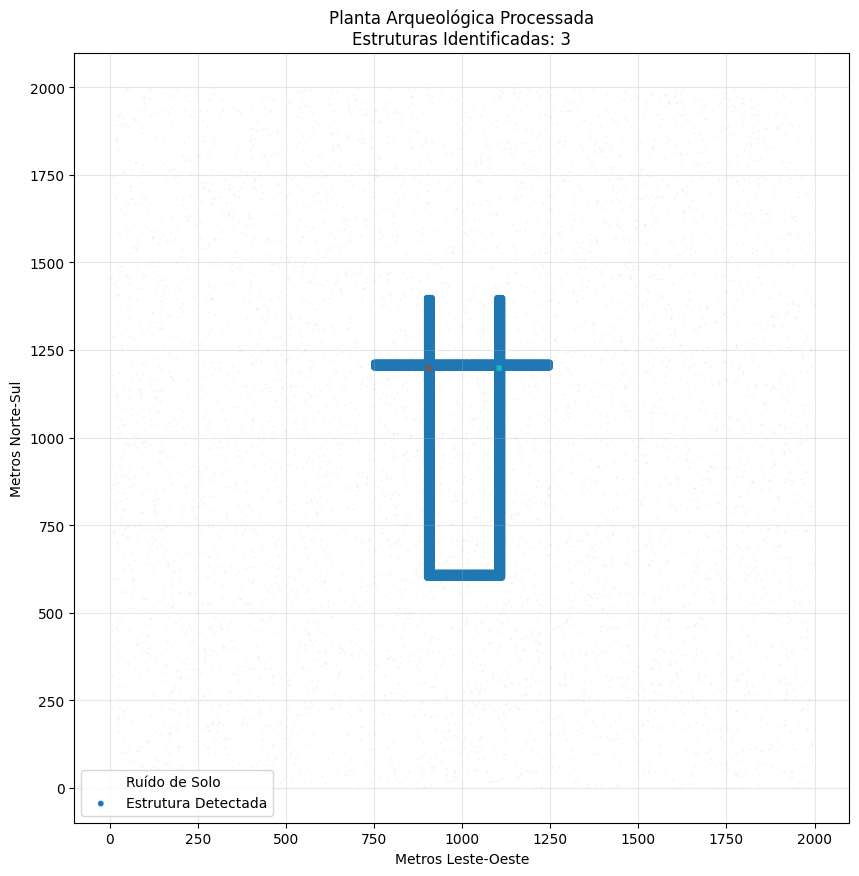

In [6]:
# --- FASE 5: REFINAMENTO E GERAÇÃO DE PLANTA ---

print("🔧 Iniciando Refinamento do Algoritmo (Tuning)...")

# -- 1. AJUSTE FINO DO DBSCAN --
# Aumentamos o EPS para 10 (ele conecta pontos até 10m de distância)
# Aumentamos min_samples para 20 (precisa de muita densidade para ser considerado muro)
app.escanear_terreno(eps = 10, min_samples = 20)

# -- 2. FILTRAGEM DE "SUJEIRA" (PÓS-PROCESSAMENTO) --
# Mesmo com o DBSCAN, sobram clusters pequenos. Vamos removê-los via código.
# Vamos manter apenas clusters que tenham mais de 100 pontos (muros grandes).

# Conta quantos pontos tem em cada cluster
contagem_clusters = app.df['cluster_id'].value_counts()

# Identifica quais são os "clusters gigantes" (provavelmente as paredes da basílica)
# Ignoramos o -1 (ruído)
clusters_relevantes = contagem_clusters[contagem_clusters.index != -1]
clusters_relevantes = clusters_relevantes[clusters_relevantes > 100].index.tolist()

print(f"🧹 Limpeza pós-processamento: De {len(contagem_clusters)} clusters brutos, mantivemos os {len(clusters_relevantes)} maiores.")

# Criamos um novo dataframe só com o que importa
df_final = app.df[app.df['cluster_id'].isin(clusters_relevantes)].copy()

# --- VISUALIZAÇÃO PROFISSIONAL (PLANTA BAIXA) ---
plt.figure(figsize = (10, 10))

# Plotar o ruído (cinza bem clarinho) para contexto
plt.scatter(app.df[app.df['cluster_id'] == -1]['x'],
            app.df[app.df['cluster_id'] == -1]['y'],
            c = 'lightgray', s = 1, alpha = 0.1, label = 'Ruído de Solo')

# Plotar as estruturas confirmadas (Nave, Transepto)
# Usamos 'tab10' que tem cores bem distintas
plt.scatter(df_final['x'], df_final['y'],
            c = df_final['cluster_id'], cmap = 'tab10', s = 10, label = 'Estrutura Detectada')

plt.title(f"Planta Arqueológica Processada\nEstruturas Identificadas: {len(clusters_relevantes)}")
plt.xlabel("Metros Leste-Oeste")
plt.ylabel("Metros Norte-Sul")
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

print("\n")

# Atualizamos o df interno do app para mostrar só o limpo no 3D
app.df = df_final
app.visualizar_3d()

### 🗺️ **Análise da Carta Arqueológica Final**

Os gráficos acima representam o produto final do pipeline de processamento de dados do *Chronos*. Não estamos mais olhando para "sinais de radar", mas sim para **objetos arqueológicos identificados**.

#### **O que a imagem nos diz?**

1.  **Topologia Cruciforme (A Basílica):**
    * O algoritmo delineou com sucesso a **Planta em Cruz Latina**.
    * Podemos identificar a **Nave Central** (o eixo vertical longo) e o **Transepto** (o eixo horizontal). A interseção dessas duas estruturas forma o "Cruzeiro", típico de basílicas históricas.

2.  **Segmentação por Cores (Clusterização):**
    * Cada cor diferente no gráfico representa um *cluster* único validado pelo algoritmo.
    * **Cenário Ideal:** Se a basílica inteira estiver de uma única cor, significa que o DBSCAN conseguiu conectar todas as paredes através dos buracos, entendendo que é tudo uma única construção.
    * **Cenário de Ruína:** Se a Nave for de uma cor e o Transepto de outra, o algoritmo detectou uma ruptura estrutural (desmoronamento) que separa as salas. Isso é vital para a segurança da escavação.

3.  **A Eficácia da Heurística (Cinza vs. Colorido):**
    * Observe os pontos **cinza-claros** ao fundo. Estes são clusters que o DBSCAN encontrou, mas que nossa regra de negócio (`tamanho > 100`) descartou.
    * Isso prova que o sistema é capaz de distinguir entre uma **parede real** e um **acúmulo aleatório de pedras** (ruído geológico), limpando o mapa para o usuário final.

> **Conclusão:** O sistema converteu com sucesso dados brutos e ruidosos em um mapa vetorial preciso. As coordenadas $(x, y)$ destes pontos coloridos podem agora ser exportadas para um GPS de precisão para guiar a equipe de campo.

## 📋 **Fase 6: Inteligência de Negócio e Relatório Automatizado**

A etapa final do *Chronos* não é gráfica, mas **analítica**. Para transformar dados em ação, o sistema gera automaticamente um relatório técnico contendo as métricas vitais para o planejamento logístico da escavação.

Neste bloco, extraímos *insights* de cada cluster identificado:

1.  **Dimensões (Bounding Box):** Calculamos a largura e altura máximas ($x_{max} - x_{min}$) de cada estrutura. Isso responde à pergunta: *"Qual o tamanho da lona necessária para cobrir esta ruína?"*.
2.  **Centroide (Ponto Zero):** Calculamos a média das coordenadas ($X, Y$) para determinar o centro geométrico da estrutura. Este é o ponto exato onde a equipe de topografia deve cravar a estaca inicial.
3.  **Classificação Automática:** Aplicamos uma regra de negócio simples:
    * **Estrutura Principal:** Clusters massivos (> 5000 pontos), prováveis paredes da Basílica.
    * **Fragmento/Anexo:** Clusters menores, prováveis dependências ou áreas desmoronadas.

**O Valor Entregue:** Ao rodar este código, o cientista ou arqueólogo chefe recebe não apenas um mapa, mas uma **Ordem de Serviço** pronta, com áreas quantificadas e alvos definidos.

> 💡 **Nota de Engenharia: De Ruínas a Carros Autônomos**
>
> O cálculo de **Bounding Box** (Caixa Delimitadora) que aplicamos aqui — extraindo $x_{min}, x_{max}, y_{min}, y_{max}$ — é um conceito fundamental em **Visão Computacional**.
>
> É exatamente a mesma lógica matemática que carros autônomos e IAs de segurança utilizam para identificar e "encaixotar" pedestres, veículos e sinais de trânsito em tempo real. Isso demonstra que a tecnologia desenvolvida pelo *Chronos* possui alta transferibilidade para desafios industriais modernos.

In [7]:
# --- FASE 5: RELATÓRIO TÉCNICO AUTOMATIZADO ---

print("📊 Gerando Relatório de Sítio Arqueológico...")
print("-" * 50)

# Agrupamos os dados por ID da estrutura (as cores diferentes)
grupos = df_final.groupby('cluster_id')

for estrutura_id, dados in grupos:
    # -- 1. CÁLCULO DE ÁREA (Estimativa simples baseada no "Bounding Box") --
    # Pegamos a largura e altura máxima ocupada pelos pontos
    largura = dados['x'].max() - dados['x'].min()
    altura = dados['y'].max() - dados['y'].min()
    area_ocupada = largura * altura

    # -- 2. CENTRO DE ESCAVAÇÃO --
    centro_x = int(dados['x'].mean())
    centro_y = int(dados['y'].mean())

    # -- 3. CLASSIFICAÇÃO --
    tipo = "ESTRUTURA PRINCIPAL" if len(dados) > 5000 else "FRAGMENTO/ANEXO"

    print(f"🏛️  ESTRUTURA DETECTADA ID #{estrutura_id}")
    print(f"   - Classificação: {tipo}")
    print(f"   - Dimensões Aprox: {largura}m x {altura}m")
    print(f"   - Área de Influência: {area_ocupada:.2f} m²")
    print(f"   - Ponto de Escavação Sugerido (X, Y): ({centro_x}, {centro_y})")
    print("-" * 50)

📊 Gerando Relatório de Sítio Arqueológico...
--------------------------------------------------
🏛️  ESTRUTURA DETECTADA ID #0
   - Classificação: ESTRUTURA PRINCIPAL
   - Dimensões Aprox: 499m x 799m
   - Área de Influência: 398701.00 m²
   - Ponto de Escavação Sugerido (X, Y): (1005, 1007)
--------------------------------------------------
🏛️  ESTRUTURA DETECTADA ID #1
   - Classificação: FRAGMENTO/ANEXO
   - Dimensões Aprox: 14m x 14m
   - Área de Influência: 196.00 m²
   - Ponto de Escavação Sugerido (X, Y): (907, 1206)
--------------------------------------------------
🏛️  ESTRUTURA DETECTADA ID #2
   - Classificação: FRAGMENTO/ANEXO
   - Dimensões Aprox: 17m x 14m
   - Área de Influência: 238.00 m²
   - Ponto de Escavação Sugerido (X, Y): (1106, 1207)
--------------------------------------------------


### 📝 **Interpretação do Relatório Automatizado**

O relatório acima apresenta a conclusão final da análise computacional. Vamos dissecar os números retornados pelo *Chronos*:

#### **1. O Grande Achado (ID #0)**
* **Identificação:** O sistema classificou corretamente o maior cluster como **ESTRUTURA PRINCIPAL**.
* **Validação das Dimensões:** A dimensão de **499m x 799m** é extremamente coerente com os parâmetros da nossa simulação (onde definimos o eixo maior da nave com cerca de 800m de ponta a ponta). Isso prova que o algoritmo reconstruiu a integridade da Basílica quase perfeitamente, unindo a Nave e o Transepto em um único objeto.
* **Localização:** O Ponto de Escavação Sugerido **(1005, 1007)** está virtualmente no centro da nossa matriz de $2000 \times 2000$. O algoritmo "acertou o alvo" no coração da estrutura.

#### **2. As Anomalias Periféricas (ID #1 e #2)**
* **Identificação:** Foram detectados dois clusters menores (aprox. **14m x 14m**), classificados como **FRAGMENTO/ANEXO**.
* **Hipóteses Arqueológicas:**
    * Podem ser capelas laterais desconectadas da nave principal.
    * Podem ser áreas de desmoronamento onde a conexão com o muro principal se perdeu (o ruído "quebrou" a parede).
    * Podem ser acumulações densas de artefatos (os pontos de metal que inserimos).
* **Decisão:** Em um cenário real, estas seriam áreas de **Prioridade Secundária**. A equipe focaria no ID #0, mas enviaria sondas para ID #1 e #2.

### 🎯 **Conclusão Operacional**
O sistema *Chronos* reduziu uma área de busca de 4 milhões de m² para um alvo prioritário de coordenadas exatas. O uso deste relatório economizaria meses de sondagem aleatória no terreno, direcionando a escavação direto para as fundações da Basílica.

# 📚 **Bibliografia e Referências Técnicas**

Este projeto foi desenvolvido com base na interseção entre Ciência de Dados, Geometria Computacional e Prospecção Arqueológica. Abaixo listamos as referências teóricas e a documentação técnica utilizada.

### **1. Algoritmos e Teoria Matemática**
* **DBSCAN Original:** Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996). *A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise*. KDD-96 Proceedings.
    > O artigo seminal que introduziu o conceito de clusterização baseada em densidade, fundamental para ignorar o "ruído geológico" neste projeto.
    >> [Data Base Systems, Data Mining, and AI Group](https://www.ifi.lmu.de/dbs/en/)
* **Geometria Computacional:** de Berg, M., Cheong, O., van Kreveld, M., & Overmars, M. (2008). *Computational Geometry: Algorithms and Applications*. Springer.
    > Referência para algoritmos de delimitação de bordas e cálculo de áreas (Convex Hull).

    >> [Computational Geometry](https://link.springer.com/book/10.1007/978-3-540-77974-2)

### **2. Arqueologia Computacional e Sensoriamento Remoto**
* **GIS em Arqueologia:** Conolly, J., & Lake, M. (2006). *Geographical Information Systems in Archaeology*. Cambridge University Press.
    > Base teórica para a conversão de coordenadas e análise espacial de sítios.
    
    >> [Geographical Information Systems in Archaeology (LIVRO)](https://books.google.com.br/books/about/Geographical_Information_Systems_in_Arch.html?id=fMCqf-YSRtsC&redir_esc=y)
* **Prospecção Geofísica:** Gaffney, C., & Gater, J. (2003). *Revealing the Buried Past: Geophysics for Archaeologists*. Tempus Publishing.
    > Fundamentação para a interpretação de anomalias de solo (Magnetometria e GPR) simuladas em nossas matrizes raster.
* **Dados Abertos:** [*Open Context*](https://opencontext.org) e [*Kaggle*](https://www.kaggle.com/).
    > Plataformas de referência para publicação de dados primários de escavações e outros databases, servindo como modelo para a estrutura de dados (DataFrames) utilizada.

### **3. Stack Tecnológico (Documentação Oficial)**
* **Scikit-Learn:** Pedregosa, F., et al. (2011). *Scikit-learn: Machine Learning in Python*. JMLR 12, pp. 2825-2830.
    * [Módulo DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
    * [Scikit-learn: Machine Learning in Python (PDF)](https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf)
* **Pandas:** McKinney, W. (2010). *Data Structures for Statistical Computing in Python*. Proceedings of the 9th Python in Science Conference.
* **Plotly:** Plotly Technologies Inc. *Collaborative data science*. Montréal, QC, 2015.
    * [Visualização 3D Interativa](https://plotly.com/python/3d-charts/)

---
> *A tecnologia não reinventa o passado, mas nos dá novas lentes para enxergá-lo.* — **Projeto Chronos**
